<u>
<h1 style = 'color: #808080; font-family: Times, serif;'> Exploring Weather Trends 
</h1> 
</u>

- <h2 style = 'color: #A9A9A9; font-family: Courier, monospace;'>QUERY</h2>

  1. <h3 style = 'margin-top: 0; font-family: "Lucida Console";'>In a specified city of your choice get their global yearly temperature average </h3>
      
      <u><h2 style = 'font-family: sans-serif; color: #C0C0C0'> solution </h2></u>
      
      <h4 style = 'margin-top: 0; font-family: "Lucida Console"'>
       WITH specified_ city AS (
    
            SELECT  city, country
            FROM  city_list
            WHERE  country = 'Nigeria' AND city = 'Lagos'
       )
      </h4>
      <h4 style = 'margin-top: 0;'> SELECT  c.year, c.city, c.country, avg_temp     
    
    FROM  city_data c                                               
    JOIN  Specified_city s                                          
    ON  s.city = c.city AND s.country = c.country                          
    ORDER BY  1
</h4>

  2. <h3 style = 'margin-top: 0; font-family: "Lucida Console";'> Target the global average from each year  </h3>
      
      <u><h2 style = 'margin-top: 0; font-family: sans-serif; color: #C0C0C0'> solution </h2></u>
      
      <h4 style = 'margin-top: 0; font-family: "Lucida Console"'>
       SELECT  year, avg_temp    
    
       FROM  global_data                                                                         
       ORDER BY 1
      </h4>


In [2]:
# installing third party libary for data vizualization 
! pip install matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 12.4 MB 3.3 MB/s eta 0:00:01███▉                | 6.2 MB 3.3 MB/s eta 0:00:02
     |████████████████████████████████| 67 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 20.2 MB 42 kB/s s eta 0:00:01    |▊                               | 481 kB 50.7 MB/s eta 0:00:01     |███▍                            | 2.2 MB 50.7 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 11.8 MB/s eta 0:00:01


In [3]:
import csv as csv# read csv file 
from matplotlib import pyplot as plt # data vizualization
%matplotlib inline 

# craet empty list to store loacal temperatur average with years
local_years = []
local_avg_temp = []

# creat empty list to store global temperatur average with years
global_years = []
global_avg_temp = []

In [4]:
# retrieving data from local csv file into local array 
with open('results 4.csv', 'r') as read_csvfile :
    
    # retrive local data in to object called local_csv_data
    local_csv_data = csv.reader(read_csvfile)
    
    # skipping first line in local_csv_data 
    next(local_csv_data)
    
    # append each line from the local_csv_data to the local_data np array
    for line in local_csv_data:
        # deleting the colume that are not required 
        del line[1]
        del line[1]
     
        # append data to local_years and local_avg_temp
        local_years.append(line[0])
        local_avg_temp.append(line[1])


In [5]:
# retrieving data from global csv file into global array 
with open('results.csv', 'r') as read_csvfiles :
    
    # retrive local data in to object called local_csv_data
    global_csv_data = csv.reader(read_csvfiles)
    
    # skipping first line in local_csv_data 
    next(global_csv_data)
    
    # append each line from the local_csv_data to the local_data np array
    for line in global_csv_data:

        # append data to global_years and global_avg_temp
        global_years.append(line[0])
        global_avg_temp.append(line[1])     
        

In [6]:
# calculating local moving average function

# setting values for x and y axis 
x = [int(x) for x in local_years] # convert from string to int 
y = [float(y) if y != '' else float(y.replace('','0.00')) for y in local_avg_temp] # convert string to float

# craete array to store 7 years moving average
local_moving_avg = []

# creat function to calculate average and append it to local_moving_average
def local_calc_moving_avg(data):
    
    # updating variables 
    one = 0
    seven = 7
    
    # creat while loop to for slicing and calculating the mean
    while seven < len(data):
        
        avg = sum(data[one:seven]) / 7 # calculating average for each seven year
        local_moving_avg.append(round(avg, 3)) # appending to local_moving_avg
        
        # update slicing variables 
        one += 1
        seven += 1   
        
# function calling 
local_calc_moving_avg(y)

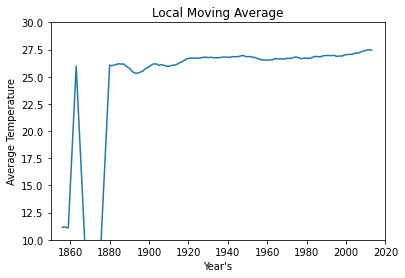

In [7]:
# ploting grahp 

plt.plot(x[7:], local_moving_avg)
plt.title('Local Moving Average') # set title
plt.xlabel("Year's") # set title for x axis 
plt.ylabel('Average Temperature') # set title for y axis
plt.xlim(1850, 2020) # setting range on x axis 
plt.ylim(10, 30) # setting range on y axis 
plt.show()


In [8]:
# calculating global moving average function

# setting values for x and y axis 
x_axis = [int(x) for x in global_years] # convert from string to int 
y_axis = [float(y) if y != '' else float(y.replace('','0.00')) for y in global_avg_temp] # convert string to float 

# craete array to store 7 years moving average
global_moving_avg = []

def global_calc_moving_avg(data):
    
    # updating variables 
    one = 0
    seven = 7
    
    # creat while loop to for slicing and calculating the mean
    while seven < len(data):
        
        avg = sum(data[one:seven]) / 7 # calculating average for each seven year
        global_moving_avg.append(round(avg, 3)) # appending to local_moving_avg
        
        # update slicing variables 
        one += 1
        seven += 1   
        
# function calling 
global_calc_moving_avg(y_axis)

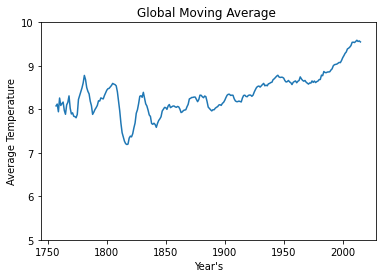

In [9]:
# ploting grahp 

plt.plot(x_axis[7:], global_moving_avg)
plt.title('Global Moving Average ') # set title
plt.xlabel("Year's") # set title for x axis 
plt.ylabel('Average Temperature') # set title for y axis
plt.ylim(5, 10) # setting range on y axis 
plt.show()

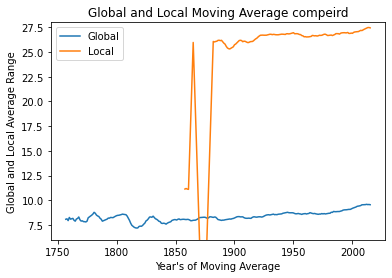

In [10]:
# compare the moving average of both local and global by joinning there graph

plt.plot(x_axis[7:], global_moving_avg)
plt.plot(x_axis[108:], local_moving_avg)
plt.title('Global and Local Moving Average compeird')
plt.xlabel("Year's of Moving Average")
plt.ylabel('Global and Local Average Range')
plt.ylim(6, 28)
plt.legend(['Global', 'Local'])
plt.show()

<h1><u>Observation Questions</u></h1>
    <ul>
    <li>Is you city hotter or cooler on averge compared to the global average ?</li>
    <li>How do the change in you city's temperature over time compare to the changes in global temperature ?</li>
    <li>Is the world getting hotter or cooler ?</li>
    <li>Has the trend been constant for the past centures ?</li>
    </ul>

<h1><u>Obsevation Answers</u></h1>
<ol>
    <li>The city of Lagos Nigeria on average has a temperature of 25 degrees fahrenheit and above      
        <p>- while the globe has an average temperature 7 degrees and above</p>
        <p style = 'margin-top: 5px;'>- which means Lagos Nigeria is hotter compared on average</p>
    </li>   
    <li style = 'margin-top: 5px;' >Changes in Lagos Nigeria per year from 1880 to 2000 has been constant between the range 25 degree Fehrenheit and 27 degree Fehrenheit but between the years 2000 upward the has been a pick between 27.5 degree fehrenheit moving up</li>
    - while globaly the has not been any constant moving average except for the pick between the years 1950 upward around the range of 8.5 degree fehrenheit  
    <li style = 'margin-top: 5px;'>Staticstics show above between the years 1950 upward the has been a constant raise in temperature from 8.5 degree fehrenheit moving up constantly </li>
    <li style = 'margin-top: 5px;'>
        <h4><u>Global centure moving average</u></h4>
        <p>Global[1700-1800]average: 8.18 degree fehrenheit</p>
    <p style = 'margin-top: 0'>Global[1800-1900]average: 8.015 degree fehrenheit</p>
    <p style = 'margin-top: 0'>Global[1900-2000]average: 8.66 degree fehrenheit</p>
    <p style = 'margin-top: 0'>Global[2000-2015]average: 9.576 degree fehrenheit</p>
    <h4><u>Local centure moving average</u></h4> 
    <p>Local[1800-1900]average: 19.31 degree fehrenheit</p>
    <p style = 'margin-top: 0'>Local[1900-2000]average: 26.96 degree fehrenheit</p>
    <p style = 'margin-top: 0'>Local[2000-2020]average: 27.39 degree fehrenheit</p>
    
</ol>